# Lecture 5: Notebook SK_00

## Sklearn Intro

![sklearn](http://scikit-learn.org/stable/_images/scikit-learn-logo-notext.png)



*scikit-learn is a Python module for machine learning built on top of SciPy and distributed under the 3-Clause BSD license.*

The project was started in 2007 by David Cournapeau as a Google Summer of Code project, and since then many volunteers have contributed. It is currently maintained by a team of volunteers.

[Github repository](https://github.com/scikit-learn/scikit-learn)

[Website](http://scikit-learn.org)

## Who is using scikit-learn?

![spotify](http://scikit-learn.org/stable/_images/spotify.png)


*Scikit-learn provides a toolbox with solid implementations of a bunch of state-of-the-art models and makes it easy to plug them into existing applications. We’ve been using it quite a lot for music recommendations at Spotify and I think it’s the most well-designed ML package I’ve seen so far.*


![evernote](http://scikit-learn.org/stable/_images/evernote.png)

*Building a classifier is typically an iterative process of exploring the data, selecting the features (the attributes of the data believed to be predictive in some way), training the models, and finally evaluating them. For many of these tasks, we relied on the excellent scikit-learn package for Python.*

## Typical ML questions

* How do I choose which attributes of my data to include in the model?
* How do I choose which model to use?
* How do I optimize this model for best performance?
* How do I ensure that I'm building a model that will generalize to unseen data?
* Can I estimate how well my model is likely to perform on unseen data?

## Benefits and drawbacks of scikit-learn

#### Benefits:
* Consistent interface to machine learning models
* Provides many tuning parameters but with sensible defaults
* Exceptional documentation
* Rich set of functionality for companion tasks
* Active community for development and support

#### Potential drawbacks:

Someone says...
* Harder (than R) to get started with machine learning
* Less emphasis (than R) on model interpretability

### Installing scikit-learn

**Option 1:** [Install scikit-learn library](http://scikit-learn.org/stable/install.html) and dependencies (NumPy and SciPy)

**Option 2:** [Install Anaconda distribution](https://www.anaconda.com/download/) of Python, which includes:

- Hundreds of useful packages (including scikit-learn)
- IPython and Jupyter Notebook
- conda package manager
- Spyder IDE

In [1]:
import sklearn

## Machine learning terminology

- Each row is an **observation** (also known as: sample, example, instance, record)
- Each column is a **feature** (also known as: predictor, attribute, independent variable, input, regressor, covariate)
- Each value we are predicting is the **response** (also known as: target, outcome, label, dependent variable)
- **Classification** is supervised learning in which the response is categorical
- **Regression** is supervised learning in which the response is ordered and continuous

## Requirements for working with data in scikit-learn

1. Features and response are **separate objects**
2. Features and response should be **numeric**
3. Features and response should be **NumPy arrays**
4. Features and response should have **specific shapes**

## A first classification example

**Step 1:** Load `wine` dataset from sklearn

store feature matrix in `X`, and response vector in `y`

In [3]:
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target

Print features and target name

In [6]:
print(wine.feature_names)
print(wine.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [7]:
print(X.shape)
print(y.shape)

(178, 13)
(178,)


**Step 2:** Import the classifier class you plan to use and instantiate the "estimator"

- "Estimator" is scikit-learn's term for model
- "Instantiate" means "make an instance of"

In [8]:
from sklearn.neighbors import KNeighborsClassifier

#### K-nearest neighbors (KNN) classification

1. Pick a value for K.
2. Search for the K observations in the training data that are "nearest" to the measurements of the unknown value.
3. Use the most popular response value from the K nearest neighbors as the predicted response value for the unknown.

Create the classifer

In [9]:
knn = KNeighborsClassifier(n_neighbors=1)

- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

[documentation](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [10]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


**Step 3:** Fit the model with data (aka "model training")

- Model is learning the relationship between X and y
- Occurs in-place

In [11]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

**Step 4:** Predict

Create a random vector of 13 floats to test the classifier

In [12]:
import numpy as np
X_new = [np.random.random_sample(13,)]
print(X_new)

[array([0.7150463 , 0.04435885, 0.47661472, 0.11954334, 0.73304265,
       0.86335558, 0.95712931, 0.17367292, 0.0535416 , 0.56783251,
       0.10717619, 0.36900854, 0.47852726])]


Predict

In [13]:
knn.predict(X_new)

array([1])

#### Using a different value for K

use `n_neighbors` equals to 5

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
knn.predict(X_new)

array([1])

#### Instantiate another classifier, e.g. LogisticRegression

In [16]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X, y)
logreg.predict(X_new)

array([0])

**Step 4 (Real one!):** Evalute the classifier!

Goal is to estimate likely performance of a model on **out-of-sample data**

## Evaluation procedure #1: Train/test split

__Idea:__ Split the dataset into two pieces, so that the model can be trained and tested on different data

**Step 1 :** Import `train_test_split` from sklearn

In [17]:
from sklearn.model_selection import train_test_split

**Step 2 :** Split `X` and `y` into training and testing sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

What did this accomplish?

- Model can be trained and tested on **different data**
- Response values are known for the testing set, and thus **predictions can be evaluated**
- **Testing accuracy** is a better estimate than training accuracy of out-of-sample performance

Print the shapes of the new `X` objects

In [22]:
print(X_train.shape)
print(X_test.shape)

(106, 13)
(72, 13)


Print the shapes of the new `y` objects

In [23]:
print(y_train.shape)
print(y_test.shape)

(106,)
(72,)


**Step 3 :** Train the model on the training set

In [24]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**Step 4 :** Make predictions on the testing set

In [25]:
y_pred = logreg.predict(X_test)

Compare actual response values `y_test` with predicted response values `y_pred`

**Step 5 :** Import metrics module

In [26]:
from sklearn import metrics

Print classification accuracy

In [27]:
metrics.accuracy_score(y_test, y_pred)

0.9305555555555556

#### Classification accuracy:

- **Proportion** of correct predictions
- Common **evaluation metric** for classification problems

### Downsides of train/test split?

- Provides a **high-variance estimate** of out-of-sample accuracy
- **K-fold cross-validation** overcomes this limitation
- But, train/test split is still useful because of its **flexibility and speed**

## Evaluation procedure #2: KFold

1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.

In [28]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


- Dataset contains **25 observations** (numbered 0 through 24)
- 5-fold cross-validation, thus it runs for **5 iterations**
- For each iteration, every observation is either in the training set or the testing set, **but not both**
- Every observation is in the testing set **exactly once**

Apply KFold to the wine dataset

In [30]:
kf = KFold(n_splits=10, shuffle=False, random_state=42)
print(kf)

KFold(n_splits=10, random_state=42, shuffle=False)


In [31]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    print(metrics.accuracy_score(y_test, y_pred))

0.9444444444444444
0.8888888888888888
1.0
0.8333333333333334
0.8888888888888888
1.0
1.0
0.8888888888888888
1.0
1.0


## Comparing cross-validation to train/test split

Advantages of **cross-validation:**

- More accurate estimate of out-of-sample accuracy
- More "efficient" use of data (every observation is used for both training and testing)

Advantages of **train/test split:**

- Runs K times faster than K-fold cross-validation
- Simpler to examine the detailed results of the testing process

## Cross-validation recommendations

1. K can be any number, but **K=10** is generally recommended
2. For classification problems, **stratified sampling** is recommended for creating the folds
    - Each response class should be represented with equal proportions in each of the K folds
    - scikit-learn's `cross_val_score` function does this by default

#### `cross_val_score` as alternative to `KFold`

In [32]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
score = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(score)

[0.68421053 0.61111111 0.66666667 0.55555556 0.66666667 0.55555556
 0.77777778 0.66666667 0.82352941 0.75      ]


In [33]:
print(score.mean())

0.6757739938080495


Test `cross_val_score` with different values of `n_neighbors`

In [34]:
nn_scores = list()
for nn in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=nn)
    score = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    nn_scores.append(score.mean())
print(nn_scores)

[0.7478134674922601, 0.6708032335741314, 0.7219341245270037, 0.6653573271413828, 0.6757739938080495, 0.6709128826969384, 0.663968438252494, 0.7032593739250086, 0.6980714654282766, 0.6977446680426558, 0.7144457344341245, 0.6921891124871001, 0.6918967148262813, 0.6862659098727211, 0.72000128998968, 0.708890178878569, 0.697452270381837, 0.7147381320949433, 0.7036270209838321]


Plot the result

Text(0,0.5,'Cross validated accuracy')

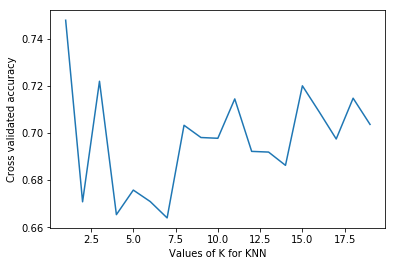

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1,20), nn_scores)
plt.xlabel("Values of K for KNN")
plt.ylabel("Cross validated accuracy")

###  Notebook Credits:
    
[justmarkham](https://github.com/justmarkham)

[online sklearn course](https://github.com/justmarkham/scikit-learn-videos)